In [9]:
import sktime
import pandas as pd
import numpy as np
import datetime as dt
import polars
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon

from giza_datasets import DatasetsLoader

In [11]:
df : polars.DataFrame = DatasetsLoader().load('tokens-daily-prices-mcap-volume')

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster

In [14]:
df_pd = df.to_pandas()

In [15]:
df_pd.head()

,date,price,market_cap,volumes_last_24h,token
0,2019-02-01,3438.360403,0.0,20589.040403,WBTC
1,2019-02-02,3472.243307,0.0,12576.723906,WBTC
2,2019-02-03,3461.058341,0.0,1852.526033,WBTC
3,2019-02-04,3468.160040,0.0,7029.292885,WBTC
4,2019-02-05,3476.127865,0.0,3544.645877,WBTC


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

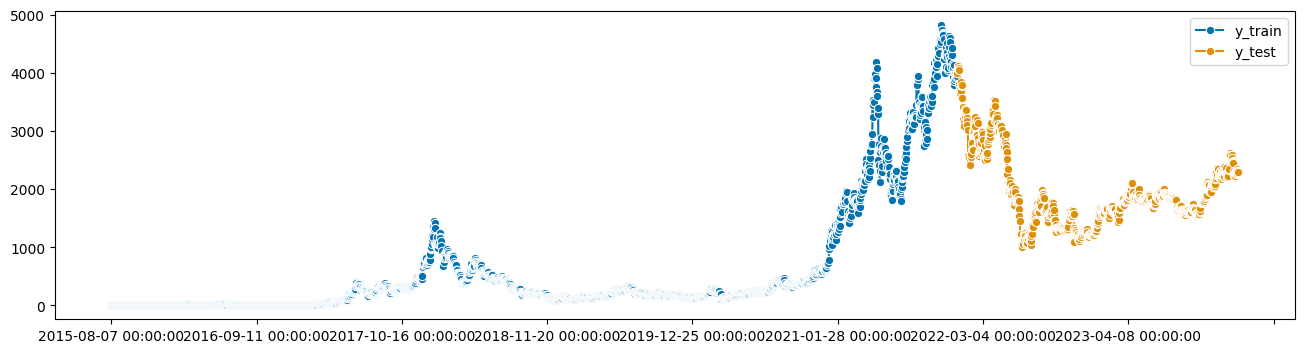

In [20]:
data = df_pd[df_pd['token'] == 'ETH'][['date','price']]
data.set_index('date',inplace=True)
y_train, y_test = temporal_train_test_split(data)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [22]:
forecaster = NaiveForecaster(strategy="last", sp = 1096)
forecaster.fit(data)

NaiveForecaster(sp=1096)

#### divider

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

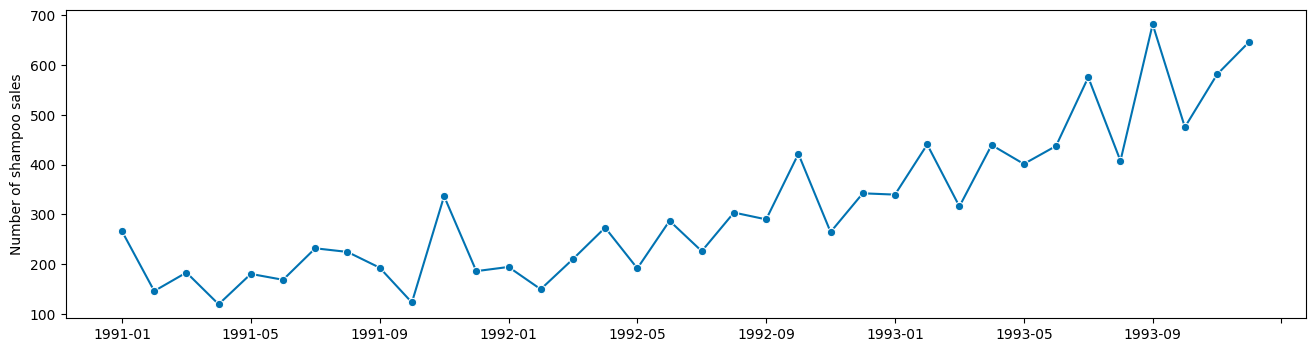

In [10]:
from sktime.datasets import load_shampoo_sales
from sktime.utils.plotting import plot_series

y = load_shampoo_sales()

plot_series(y)

In [11]:
y_train, y_test = temporal_train_test_split(y, test_size=12)
fh = ForecastingHorizon(y_test.index, is_relative=False)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

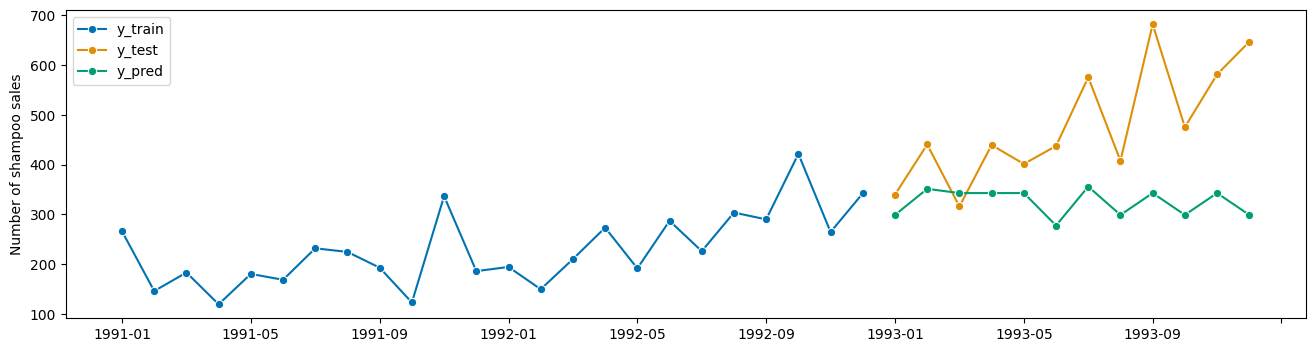

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction

regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, strategy="recursive", window_length=12)
forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict()
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [13]:
from skl2onnx import to_onnx

In [15]:
to_onnx(forecaster)

NotImplementedError: Initial types must be specified.